In [62]:
import numpy as np
import pandas as pd
import joblib

In [2]:
g1 = pd.DataFrame(np.random.randint(80,100, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g2 = pd.DataFrame(np.random.randint(70,79, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g3 = pd.DataFrame(np.random.randint(60,69, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g4 = pd.DataFrame(np.random.randint(50,59, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g5 = pd.DataFrame(np.random.randint(40,49, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g6 = pd.DataFrame(np.random.randint(33,39, size=(800000,5)), columns = ["s1",'s2','s3','s4','s5'])
g7 = pd.DataFrame(np.random.randint(0,32, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])

In [3]:
g1

,s1,s2,s3,s4,s5
0,93,94,85,84,82
1,91,97,97,89,80
2,80,80,99,98,92
3,83,96,87,93,97
4,97,91,94,81,83
...,...,...,...,...,...
39995,81,90,95,91,85
39996,97,84,86,87,92
39997,80,82,97,99,85
39998,82,96,93,92,98


In [4]:
g1.value_counts()


s1  s2  s3  s4  s5
87  87  97  99  80    2
93  86  81  95  84    2
85  93  92  97  93    2
83  96  88  90  90    2
    84  97  96  84    2
                     ..
86  91  92  80  93    1
            82  90    1
            88  82    1
            89  84    1
99  99  99  98  91    1
Length: 39758, dtype: int64

In [5]:
nunique_vals = g1.nunique().sum()
print(nunique_vals)

100


In [6]:
df = pd.concat([g1,g2,g3,g4,g5,g6,g7])
print(len(df))

1040000


In [7]:
df

,s1,s2,s3,s4,s5
0,93,94,85,84,82
1,91,97,97,89,80
2,80,80,99,98,92
3,83,96,87,93,97
4,97,91,94,81,83
...,...,...,...,...,...
39995,11,3,10,13,9
39996,12,2,31,28,9
39997,20,29,16,7,27
39998,20,26,7,19,13


In [8]:
df = df.drop_duplicates()
print(len(df))

203701


In [9]:
df.head()

,s1,s2,s3,s4,s5
0,93,94,85,84,82
1,91,97,97,89,80
2,80,80,99,98,92
3,83,96,87,93,97
4,97,91,94,81,83


In [10]:
df.notnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203701 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   s1      203701 non-null  bool 
 1   s2      203701 non-null  bool 
 2   s3      203701 non-null  bool 
 3   s4      203701 non-null  bool 
 4   s5      203701 non-null  bool 
dtypes: bool(5)
memory usage: 2.5 MB


# Symbolic Ai

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203701 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   s1      203701 non-null  int32
 1   s2      203701 non-null  int32
 2   s3      203701 non-null  int32
 3   s4      203701 non-null  int32
 4   s5      203701 non-null  int32
dtypes: int32(5)
memory usage: 5.4 MB


In [12]:
def grade(sb1, sb2, sb3, sb4, sb5):
    total = 500
    obtain = sb1 + sb2 + sb3 +sb4 + sb5
    perct = 100 * obtain / total
    grade =None
    
    if perct >=80:
        grade="A+"
    
    elif perct >=70:
        grade="A"
        
    
    elif perct >=60:
        grade="B"
        
    
    elif perct >=50:
        grade="C"
        
    
    elif perct >=40:
        grade="D"
        
    else:
        grade="fail"
        
    return total , obtain ,perct,grade
#     return total, obtain , per , grade
        

In [13]:
print(grade(70, 87, 66, 78, 78))

(500, 379, 75.8, 'A')


In [14]:
df[["Total","Obtained","Percentage","Grade"]] = df[["s1","s2","s3","s4","s5"]].apply(lambda x:grade(x[0],x[1],x[2],x[3],x[4]), axis=1, result_type='expand')
df

C:\Users\HAMZA ABBAS\AppData\Local\Temp\ipykernel_11876\551066515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["Total","Obtained","Percentage","Grade"]] = df[["s1","s2","s3","s4","s5"]].apply(lambda x:grade(x[0],x[1],x[2],x[3],x[4]), axis=1, result_type='expand')
C:\Users\HAMZA ABBAS\AppData\Local\Temp\ipykernel_11876\551066515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["Total","Obtained","Percentage","Grade"]] = df[["s1","s2","s3","s4","s5"]].apply(lambda x:grade(x[0],x[1],x[2],x[3]

,s1,s2,s3,s4,s5,Total,Obtained,Percentage,Grade
0,93,94,85,84,82,500,438,87.6,A+
1,91,97,97,89,80,500,454,90.8,A+
2,80,80,99,98,92,500,449,89.8,A+
3,83,96,87,93,97,500,456,91.2,A+
4,97,91,94,81,83,500,446,89.2,A+
...,...,...,...,...,...,...,...,...,...
39995,11,3,10,13,9,500,46,9.2,fail
39996,12,2,31,28,9,500,82,16.4,fail
39997,20,29,16,7,27,500,99,19.8,fail
39998,20,26,7,19,13,500,85,17.0,fail


In [15]:
df.Grade.value_counts()

fail    47754
A+      39758
A       29101
D       29043
B       29029
C       29016
Name: Grade, dtype: int64

In [16]:
df.Grade.unique()

array(['A+', 'A', 'B', 'C', 'D', 'fail'], dtype=object)

In [17]:
df1 = pd.DataFrame()
test = pd.DataFrame()
for i in df.Grade.unique():
    df1 =pd.concat([df1,df[df.Grade==i].head(7676)])
    
    test = pd.concat([test,df[df.Grade==i].tail(100)])
print(len(df1))
print(len(test))

46056
600


In [18]:
df1.head(100)

,s1,s2,s3,s4,s5,Total,Obtained,Percentage,Grade
0,93,94,85,84,82,500,438,87.6,A+
1,91,97,97,89,80,500,454,90.8,A+
2,80,80,99,98,92,500,449,89.8,A+
3,83,96,87,93,97,500,456,91.2,A+
4,97,91,94,81,83,500,446,89.2,A+
...,...,...,...,...,...,...,...,...,...
95,93,86,96,93,89,500,457,91.4,A+
96,92,90,96,96,83,500,457,91.4,A+
97,96,84,98,83,89,500,450,90.0,A+
98,83,88,96,82,80,500,429,85.8,A+


In [19]:
df1.iloc[:100]


,s1,s2,s3,s4,s5,Total,Obtained,Percentage,Grade
0,93,94,85,84,82,500,438,87.6,A+
1,91,97,97,89,80,500,454,90.8,A+
2,80,80,99,98,92,500,449,89.8,A+
3,83,96,87,93,97,500,456,91.2,A+
4,97,91,94,81,83,500,446,89.2,A+
...,...,...,...,...,...,...,...,...,...
95,93,86,96,93,89,500,457,91.4,A+
96,92,90,96,96,83,500,457,91.4,A+
97,96,84,98,83,89,500,450,90.0,A+
98,83,88,96,82,80,500,429,85.8,A+


In [20]:
df.tail(10)

,s1,s2,s3,s4,s5,Total,Obtained,Percentage,Grade
39990,30,31,31,22,14,500,128,25.6,fail
39991,0,14,7,16,6,500,43,8.6,fail
39992,20,12,0,12,0,500,44,8.8,fail
39993,28,25,26,3,12,500,94,18.8,fail
39994,5,18,26,21,13,500,83,16.6,fail
39995,11,3,10,13,9,500,46,9.2,fail
39996,12,2,31,28,9,500,82,16.4,fail
39997,20,29,16,7,27,500,99,19.8,fail
39998,20,26,7,19,13,500,85,17.0,fail
39999,13,31,23,18,20,500,105,21.0,fail


In [21]:
display(df1)

,s1,s2,s3,s4,s5,Total,Obtained,Percentage,Grade
0,93,94,85,84,82,500,438,87.6,A+
1,91,97,97,89,80,500,454,90.8,A+
2,80,80,99,98,92,500,449,89.8,A+
3,83,96,87,93,97,500,456,91.2,A+
4,97,91,94,81,83,500,446,89.2,A+
...,...,...,...,...,...,...,...,...,...
34092,38,34,37,36,38,500,183,36.6,fail
34156,37,37,37,38,37,500,186,37.2,fail
34305,37,37,36,37,36,500,183,36.6,fail
34319,34,38,33,38,35,500,178,35.6,fail


# Create data for the machine learning model

In [22]:
data = df1[["s1","s2","s3","s4","s5","Percentage","Grade"]].copy()
data = data.sample(frac=1)
data

,s1,s2,s3,s4,s5,Percentage,Grade
993,42,40,41,42,45,42.0,D
3944,93,87,90,80,97,89.4,A+
650,47,40,43,42,48,44.0,D
2383,34,33,34,34,35,34.0,fail
4662,83,84,80,84,84,83.0,A+
...,...,...,...,...,...,...,...
3169,43,47,48,43,40,44.2,D
1375,63,68,61,65,68,65.0,B
9751,34,37,36,33,35,35.0,fail
1217,72,78,75,76,70,74.2,A


In [23]:
data.corr()

C:\Users\HAMZA ABBAS\AppData\Local\Temp\ipykernel_11876\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,s1,s2,s3,s4,s5,Percentage
s1,1.000000,0.969387,0.969088,0.969124,0.969521,0.987676
s2,0.969387,1.000000,0.968866,0.969116,0.969292,0.987573
s3,0.969088,0.968866,1.000000,0.969282,0.969090,0.987521
s4,0.969124,0.969116,0.969282,1.000000,0.968992,0.987556
s5,0.969521,0.969292,0.969090,0.968992,1.000000,0.987641
Percentage,0.987676,0.987573,0.987521,0.987556,0.987641,1.000000


C:\Users\HAMZA ABBAS\AppData\Local\Temp\ipykernel_11876\2948171267.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().plot(kind='bar',);


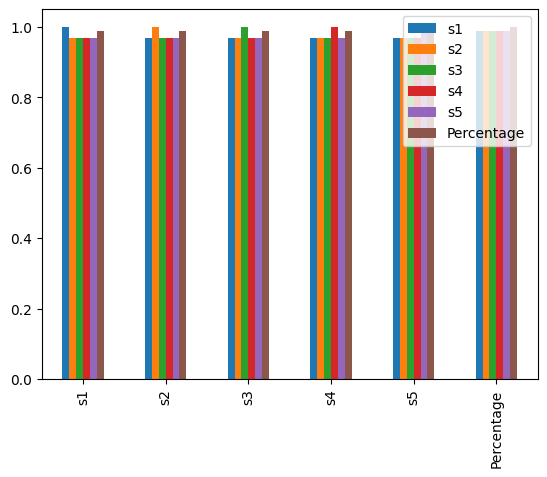

In [24]:
data.corr().plot(kind='bar',);

In [25]:
grades={
    'A+':7,
    'A':6,
    'B':5,
    'C':4,
    'D':3,
    'E':2,
    'fail':1
}
data['Grade1'] = data.Grade.map(grades)# map with dictionary
data.sample(20)

,s1,s2,s3,s4,s5,Percentage,Grade,Grade1
3695,72,77,78,75,72,74.8,A,6
5076,47,45,43,48,40,44.6,D,3
3102,84,98,86,87,88,88.6,A+,7
3587,95,90,90,85,81,88.2,A+,7
7082,43,44,48,47,46,45.6,D,3
1439,35,38,38,37,36,36.8,fail,1
632,68,66,60,67,61,64.4,B,5
5372,53,54,52,54,55,53.6,C,4
4147,43,48,48,44,45,45.6,D,3
4392,57,52,54,56,56,55.0,C,4


C:\Users\HAMZA ABBAS\AppData\Local\Temp\ipykernel_11876\2984596910.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().plot(kind='bar');


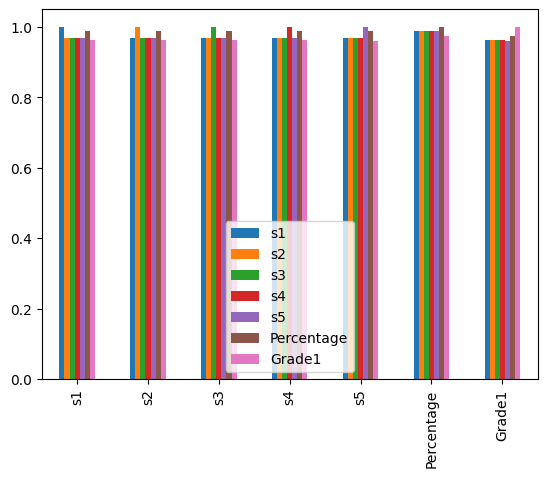

In [26]:
data.corr().plot(kind='bar');

C:\Users\HAMZA ABBAS\AppData\Local\Temp\ipykernel_11876\2545985938.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().plot(kind='bar', legend=False)


<Axes: >

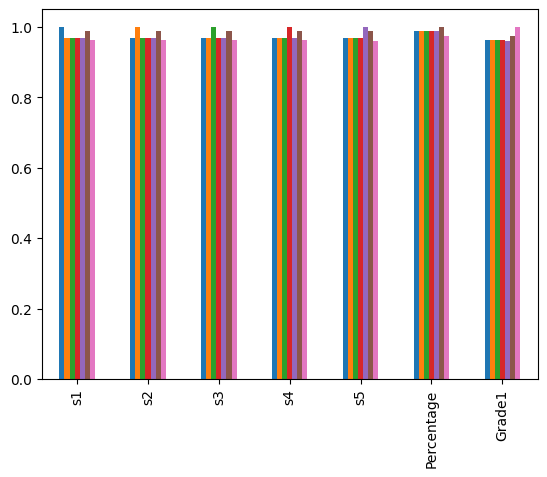

In [27]:
data.corr().plot(kind='bar', legend=False)

In [28]:
data[["Percentage","Grade1"]].corr()

,Percentage,Grade1
Percentage,1.00000,0.97386
Grade1,0.97386,1.00000


# Find Grade (Rules) with Machine Learning

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [30]:
!pip3 install scikit-learn

In [31]:
data[["Percentage","Grade1"]].corr()

,Percentage,Grade1
Percentage,1.00000,0.97386
Grade1,0.97386,1.00000


# Now select the feature based on above stats technique

In [32]:
data.head()

,s1,s2,s3,s4,s5,Percentage,Grade,Grade1
993,42,40,41,42,45,42.0,D,3
3944,93,87,90,80,97,89.4,A+,7
650,47,40,43,42,48,44.0,D,3
2383,34,33,34,34,35,34.0,fail,1
4662,83,84,80,84,84,83.0,A+,7


In [53]:
feature = ['Percentage']

X = data[feature]
Y = data.Grade

In [56]:
print(type(X))
X.head()

<class 'pandas.core.frame.DataFrame'>


,Percentage
993,42.0
3944,89.4
650,44.0
2383,34.0
4662,83.0


In [57]:
print(type(Y))
Y.head()

<class 'pandas.core.series.Series'>


993        D
3944      A+
650        D
2383    fail
4662      A+
Name: Grade, dtype: object

# Split data in Training and Test dataset

X_train, X_test
Y_train, Y_test

In [58]:
print("X_len",len(X),"Y_len",len(Y))
print("train X",int(54432*70/100))
X_train,X_test ,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=True)


print("X_train",len(X_train), "\n")
print("X_test",len(X_test), "\n")
print("Y_train",len(Y_train), "\n")
print("Y_test",len(Y_test), "\n")


X_len 46056 Y_len 46056
train X 38102
X_train 32239 

X_test 13817 

Y_train 32239 

Y_test 13817 



In [59]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [64]:
# Save the model to disk
joblib.dump(clf, 'my_model.pkl')

['my_model.pkl']

In [60]:
X_test

,Percentage
4820,35.8
8021,55.2
5495,42.2
1052,44.0
4361,34.6
...,...
3657,45.8
1312,43.2
4741,92.4
2562,65.6


In [61]:
Y_predict = clf.predict(X_test)
Y_predict

array(['fail', 'C', 'D', ..., 'A+', 'B', 'D'], dtype=object)

In [40]:
abc =X_test.copy()
abc['Actual_Y'] =Y_test
abc['predection'] = clf.predict(X_test)# add prediction column

abc

,Percentage,Actual_Y,predection
4820,35.8,fail,fail
8021,55.2,C,C
5495,42.2,D,D
1052,44.0,D,D
4361,34.6,fail,fail
...,...,...,...
3657,45.8,D,D
1312,43.2,D,D
4741,92.4,A+,A+
2562,65.6,B,B


In [41]:
print(metrics.classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00      2292
          A+       1.00      1.00      1.00      2263
           B       1.00      1.00      1.00      2321
           C       1.00      1.00      1.00      2301
           D       1.00      1.00      1.00      2263
        fail       1.00      1.00      1.00      2377

    accuracy                           1.00     13817
   macro avg       1.00      1.00      1.00     13817
weighted avg       1.00      1.00      1.00     13817



In [42]:
clf.predict([[100]])

C:\python3.10\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['A+'], dtype=object)

# Display learning Rules

In [43]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(0.75, 0.9, 'x[0] <= 79.4\ngini = 0.833\nsamples = 32239\nvalue = [5384, 5413, 5355, 5375, 5413, 5299]\nclass = y[1]'),
 Text(0.625, 0.7, 'x[0] <= 69.0\ngini = 0.8\nsamples = 26826\nvalue = [5384, 0, 5355, 5375, 5413, 5299]\nclass = y[4]'),
 Text(0.5, 0.5, 'x[0] <= 49.0\ngini = 0.75\nsamples = 21442\nvalue = [0, 0, 5355, 5375, 5413, 5299]\nclass = y[4]'),
 Text(0.25, 0.3, 'x[0] <= 39.2\ngini = 0.5\nsamples = 10712\nvalue = [0, 0, 0, 0, 5413, 5299]\nclass = y[4]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 5299\nvalue = [0, 0, 0, 0, 0, 5299]\nclass = y[5]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 5413\nvalue = [0, 0, 0, 0, 5413, 0]\nclass = y[4]'),
 Text(0.75, 0.3, 'x[0] <= 59.0\ngini = 0.5\nsamples = 10730\nvalue = [0, 0, 5355, 5375, 0, 0]\nclass = y[3]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 5375\nvalue = [0, 0, 0, 5375, 0, 0]\nclass = y[3]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 5355\nvalue = [0, 0, 5355, 0, 0, 0]\nclass = y[2]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples =

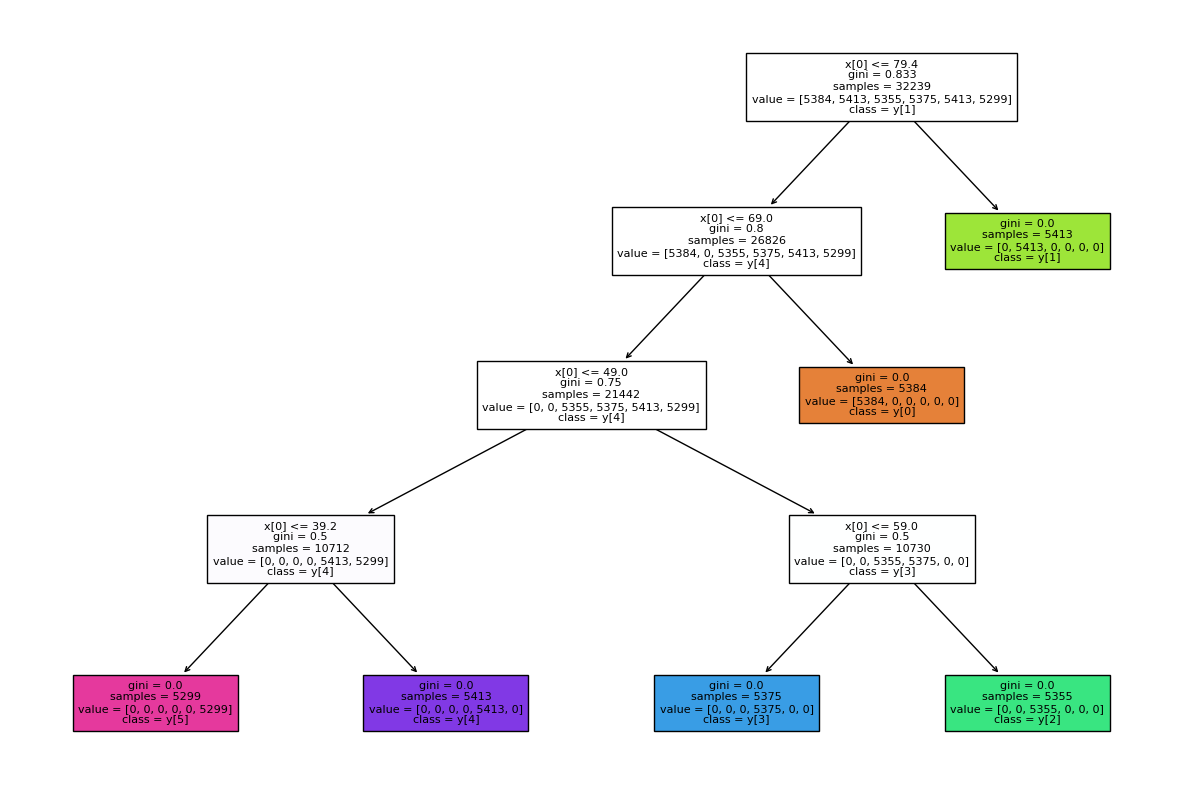

In [44]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, class_names=True, fontsize=8)

In [45]:
clf.predict([[50.99999]])

C:\python3.10\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['C'], dtype=object)